# Student Performance Dataset
## Task Overview
In this lab activity, your task is to build a Linear Regression model using a subset of data points from the Student Performance data. The following are the specific sub-tasks you must accomplish.

1. **Load the Data** 
- Load the provided Student Performance data in your Jupyter Notebook.
2. **Select a Unique Randomization Seed** 
- Select a unique integer that will serve as the seed for your randomization.
3. **Sample Train Data** 
- Randomly sample a subset of the data using the seed you have selected; limit the sample to 30. Ensure that your sampled data is representative of the population.
4. **Weight Update Function** 
- Build a weight update function following the Gradient Descent concept.
5. **Display the Values of Weights** 
- Print the values of weights at each iteration separated by individual cell.
6. **Plot the Value of Weights** 
- Display a line chart showing the variation of weight values per iteration. Per each weight, show an individual line chart of values against iteration.
7. **Build a Function for the Final Regression Model** 
- Create a function using the final regression model after all your iterations. Display the mathematical expression with all the final weights values multiplied by the input variables.
8. **Sample Test Data** 
- From the remainder of the original dataset, randomly sample another set of 30 observations NOT present in your training sample.
9. **Use the Regression Function for Prediction** 
- Use your built linear regression function to predict for the Target Variable in your test set.
10. **Calculate for Errors** 
- Calculate for the overall error between your model’s prediction and the actual values in the test set.

The final deliverable will include your code implementation divided into sections according to above subtasks.

## Dataset Overview
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

## Dataset Attributes
The dataset consists of 5 input features and one target variable:

**Input Features:**
- **Hours Studied:** The total number of hours spent studying by each student.
- **Previous Scores:** The scores obtained by students in previous tests.
- **Extracurricular Activities:** Whether the student participates in extracurricular activities (1 = Yes or 0 = No).
- **Sleep Hours:** The average number of hours of sleep the student had per day.
- **Sample Question Papers Practiced:** The number of sample question papers the student practiced.

**Target Variable**
- **Performance Index:** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.



## Load the Data
Load the provided Student Performance data in your Jupyter Notebook.

In [139]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the Student Performance Dataset
data = pd.read_csv('./Student_Performance (1).csv')


In [140]:
# Check the non-null count and the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [141]:
# Examine the basic statistical information of the dataset
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [142]:
# Display the top and bottom 5 rows of the dataset
pd.concat([data.head(), data.tail()])

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95
9999,7,74,0,8,1,64


In [143]:
# Extract the features and the target variable
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = data['Performance Index'].values

### Select a Unique Randomization Seed
Select a unique integer that will serve as the seed for your randomization.

In [144]:
# Set a unique integer for the randomzied seed
unique_seed = 42
np.random.seed(unique_seed)

### Sample Train Data
Randomly sample a subset of the data using the seed you have selected; limit the sample to 30. Ensure that your sampled data is representative of the population.

In [145]:
# Sample the Student Performance data to 30 with the unique seed as the random state
sampled_indices = np.random.choice(len(X), size=30, replace=False)
X_train = X[sampled_indices]
y_train = y[sampled_indices]

### Weight Update Function
Build a weight update function following the Gradient Descent concept.

In [146]:
# Scale the data before applying gradient descent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Implement gradient descent to find the optimal weights for linear regression.
def gradient_descent(X, y, learning_rate, n_iterations):
    n_samples, n_features = X.shape

    # Initialize weights and bias to zeros, and store the weights history at each iteration
    w = np.zeros(n_features)
    b = 0
    weights_history = []

    for i in range(n_iterations):
        # Calculate predictions using linear equation: y = Xw + b
        y_pred = np.dot(X, w) + b 

        # Calculate the error
        error = y_pred - y.flatten()

        # Calculate the gradients
        dw = (1/n_samples) * np.dot(X.T, error)
        db = (1/n_samples) * np.sum(error)

        # Update the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Store a copy of the weights
        weights_history.append(w.copy())

        # Print the loss (MSE) for monitoring convergence
        if i % 500 == 0:
            loss = (1/(2*n_samples)) * np.sum(error**2)
            print(f"Iteration {i}: Loss = {loss}")


    return w, b, weights_history

learning_rate = 0.001
n_iterations = 5000

w, b, weights_history = gradient_descent(X_train_scaled, y_train, learning_rate, n_iterations)

Iteration 0: Loss = 1552.1666666666667
Iteration 500: Loss = 565.4473622605141
Iteration 1000: Loss = 208.3357677410227
Iteration 1500: Loss = 78.28256638650652
Iteration 2000: Loss = 30.666659809341997
Iteration 2500: Loss = 13.149238439189158
Iteration 3000: Loss = 6.674934039885094
Iteration 3500: Loss = 4.270756906330737
Iteration 4000: Loss = 3.373427648879842
Iteration 4500: Loss = 3.036591734537582


### Display the Values of Weights
Print the values of weights at each iteration separated by individual cell.

In [147]:
# Put in a dataframe the values of weights of each feature and print
feature_names = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

print("Final Weights:")
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': w})
print(weights_df)

Final Weights:
                            Feature     Weight
0                     Hours Studied   6.860363
1                   Previous Scores  17.024243
2        Extracurricular Activities   0.812760
3                       Sleep Hours   0.727544
4  Sample Question Papers Practiced   0.735835


### Plot the Value of Weights
Display a line chart showing the variation of weight values per iteration. Per each weight, show an individual line chart of values against iteration.

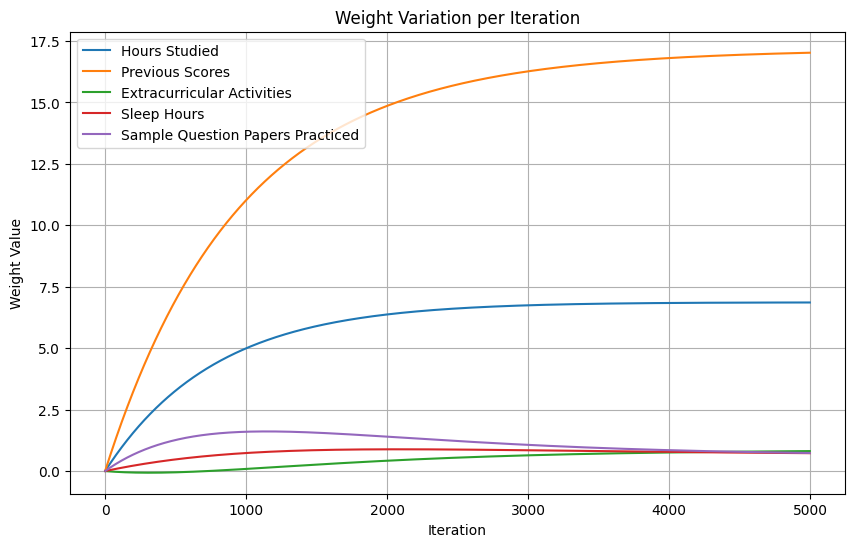

In [148]:
num_features = len(feature_names)
iterations  = range(n_iterations)

plt.figure(figsize=(10, 6))

for j in range(num_features):
    # Extract thje weight values for the j-th feature
    weight_values = [weights[j] for weights in weights_history]

    # Plots the weight values against the iteration
    plt.plot(iterations, weight_values, label=feature_names[j])

plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.title("Weight Variation per Iteration")
plt.legend()
plt.grid(True)
plt.show()

### Build a Function for the Final Regression Model
Create a function using the final regression model after all your iterations. Display the mathematical expression with all the final weights values multiplied by the input variables.

In [149]:
def predict(X_new, w, b, scaler):
    # Convert to NumPy Array if it is a dataframe
    if isinstance(X_new, pd.DataFrame):
        X_new = X_new.values

    # Scale the new data using the scaler
    X_new_scaled = scaler.transform(X_new)
    y_pred = np.dot(X_new_scaled, w) + b

    return y_pred

# Display the mathematical expression of the linear regression model
def display_equation(w, b, feature_names):
    # Start the equation string
    equation = "Performance Index = "

    for i, (weight, feature) in enumerate(zip(w, feature_names)):
        if i > 0:
            equation += " + "
        equation += f"{weight:.4f} * {feature}"

    equation + f" + {b:.4f}"
    print("Regression Equation:")
    print(equation)


### Sample Test Data
From the remainder of the original dataset, randomly sample another set of 30 observations NOT present in your training sample.

In [150]:
# Identify the remaining data
remaining_mask = np.ones(len(X), dtype=bool)
remaining_mask[sampled_indices] = False
X_remaining = X[remaining_mask]
y_remaining = y[remaining_mask]

# New sample from remaining data
np.random.seed(100)
new_indices = np.random.choice(len(X_remaining), size=30, replace=False)
X_test = X_remaining[new_indices]
y_test = y_remaining[new_indices]

### Use the Regression Function for Prediction
Use your built linear regression function to predict for the Target Variable in your test set.

In [151]:
# Predict on the test set
y_pred_test = predict(X_test, w, b, scaler)
display_equation(w, b, feature_names)

Regression Equation:
Performance Index = 6.8604 * Hours Studied + 17.0242 * Previous Scores + 0.8128 * Extracurricular Activities + 0.7275 * Sleep Hours + 0.7358 * Sample Question Papers Practiced


### Calculate for Errors
Calculate for the overall error between your model’s prediction and the actual values in the test set.

In [152]:
# Evaluate the model on the test set
test_loss = mean_squared_error(y_test, y_pred_test)
rsquare = r2_score(y_test, y_pred_test)
print("Test Loss (MSE):", test_loss)
print("R-squared Score: ", rsquare)

Test Loss (MSE): 6.820108110795457
R-squared Score:  0.9845266763138986
